In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as  plt
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [29]:
housing=pd.read_csv('Housing.csv')
housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
housing.mainroad = housing.mainroad.map(dict(yes=1,no=0))
housing.guestroom = housing.guestroom.map(dict(yes=1,no=0))
housing.basement = housing.basement.map(dict(yes=1,no=0))
housing.hotwaterheating = housing.hotwaterheating.map(dict(yes=1,no=0))
housing.airconditioning = housing.airconditioning.map(dict(yes=1,no=0))
housing.prefarea = housing.prefarea.map(dict(yes=1,no=0))

housing.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [31]:
housing.shape

(545, 13)

In [32]:
X = housing.iloc[:, 1:12].values
X.shape
X

array([[7420,    4,    2, ...,    1,    2,    1],
       [8960,    4,    4, ...,    1,    3,    0],
       [9960,    3,    2, ...,    0,    2,    1],
       ...,
       [3620,    2,    1, ...,    0,    0,    0],
       [2910,    3,    1, ...,    0,    0,    0],
       [3850,    3,    1, ...,    0,    0,    0]], dtype=int64)

In [33]:
Y = housing.iloc[:, 0].values
Y.shape

(545,)

In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y =Y.reshape(-1,1)
Y.shape
#Y= scaler.fit_transform(Y)

(545, 1)

In [35]:
Y_st= scaler.fit_transform(Y)
Y_st.shape

(545, 1)

In [36]:
 MSE=np.zeros(12)
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_st, test_size = 0.2, random_state = 0)
    
    print (f"nunmber of components (new features)= {k}")
    svr = SVR(kernel='rbf').fit(X_train, Y_train.ravel())
    yfit = svr.predict(X_test)
    #score = svr.score(X_train,Y_train)
    MSE[k] = mean_squared_error(Y_test, yfit)
    #print("R-squared:", score)
    print("MSE:", MSE[k])


nunmber of components (new features)= 1
MSE: 0.37040277607999555
nunmber of components (new features)= 2
MSE: 0.35942733295888774
nunmber of components (new features)= 3
MSE: 0.32288754128708935
nunmber of components (new features)= 4
MSE: 0.31643026462970064
nunmber of components (new features)= 5
MSE: 0.32943023788456605
nunmber of components (new features)= 6
MSE: 0.32580232694916295
nunmber of components (new features)= 7
MSE: 0.3217177291777344
nunmber of components (new features)= 8
MSE: 0.3276750583528447
nunmber of components (new features)= 9
MSE: 0.3496016814302716
nunmber of components (new features)= 10
MSE: 0.3499788045877958
nunmber of components (new features)= 11
MSE: 0.34800643643616724


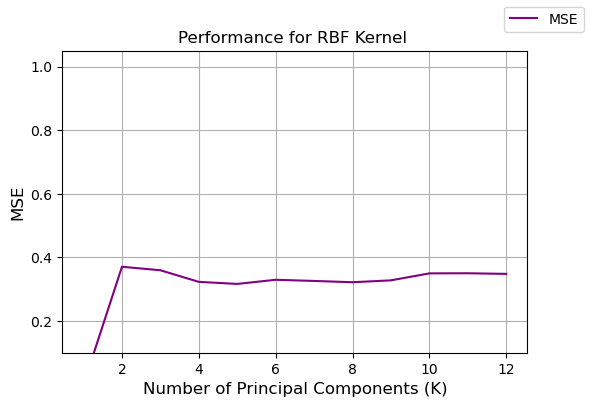

In [37]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0.1, 1.05])
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE", fontsize = 12)
plt.title('Performance for RBF Kernel ')
plt.plot(xaxis, MSE, label="MSE", color = 'purple') 
fig.legend(loc = "upper right")
plt.grid()

In [38]:
MSE=np.zeros(12)
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_st, test_size = 0.2, random_state = 0)
    
    print (f"nunmber of components (new features)= {k}")
    svr = SVR(kernel='linear').fit(X_train, Y_train.ravel())
    yfit = svr.predict(X_test)
    #score = svr.score(X_train,Y_train)
    MSE[k] = mean_squared_error(Y_test, yfit)
    #print("R-squared:", score)
    print("MSE:", MSE[k])

nunmber of components (new features)= 1
MSE: 0.28606110203015395
nunmber of components (new features)= 2
MSE: 0.28072317074858766
nunmber of components (new features)= 3
MSE: 0.2799131286707927
nunmber of components (new features)= 4
MSE: 0.2792874543178448
nunmber of components (new features)= 5
MSE: 0.28813713940168734
nunmber of components (new features)= 6
MSE: 0.2897500103339163
nunmber of components (new features)= 7
MSE: 0.3040787045421742
nunmber of components (new features)= 8
MSE: 0.30125245863242384
nunmber of components (new features)= 9
MSE: 0.2870638035450679
nunmber of components (new features)= 10
MSE: 0.28772432580320967
nunmber of components (new features)= 11
MSE: 0.27130339592234887


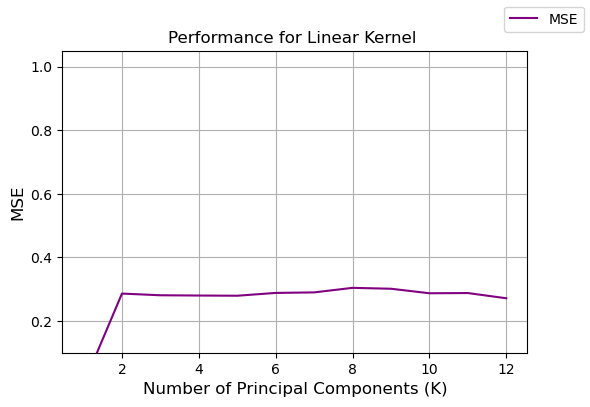

In [39]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0.1, 1.05])
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE", fontsize = 12)
plt.plot(xaxis, MSE, label="MSE", color = 'purple') 
plt.title('Performance for Linear Kernel ')
fig.legend(loc = "upper right")
plt.grid()

In [40]:
MSE=np.zeros(12)
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_st, test_size = 0.2, random_state = 0)
    
    print (f"nunmber of components (new features)= {k}")
    #svr = SVR(kernel='poly', C=1e3, gamma=0.1).fit(X_train, Y_train)
    svr = SVR(kernel='sigmoid').fit(X_train, Y_train.ravel())
    yfit = svr.predict(X_test)
    #score = svr.score(X_train,Y_train)
    MSE[k] = mean_squared_error(Y_test, yfit)
    #print("R-squared:", score)
    print("MSE:", MSE[k])

nunmber of components (new features)= 1
MSE: 341.1569136038757
nunmber of components (new features)= 2
MSE: 108.87894281148964
nunmber of components (new features)= 3
MSE: 41.429350566944336
nunmber of components (new features)= 4
MSE: 21.70423857522601
nunmber of components (new features)= 5
MSE: 20.496533039964493
nunmber of components (new features)= 6
MSE: 14.168494051949748
nunmber of components (new features)= 7
MSE: 8.532233065517865
nunmber of components (new features)= 8
MSE: 5.215687694642771
nunmber of components (new features)= 9
MSE: 4.299875330696744
nunmber of components (new features)= 10
MSE: 3.156523665260074
nunmber of components (new features)= 11
MSE: 3.970678141150567


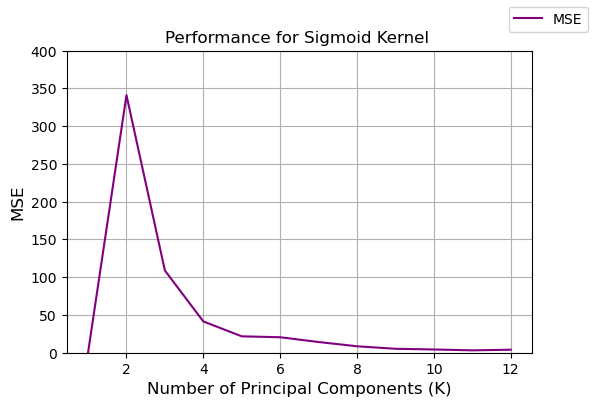

In [41]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0, 400])
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.ylabel("MSE", fontsize = 12)
plt.plot(xaxis, MSE, label="MSE", color = 'purple') 
plt.title('Performance for Sigmoid Kernel ')
fig.legend(loc = "upper right")
plt.grid()

In [42]:
MSE=np.zeros(12)
for k in range(1,12):  
    pca = PCA(n_components = k)
    principalComponents = pca.fit_transform(X)
    
    X_train, X_test, Y_train, Y_test = train_test_split(principalComponents, Y_st, test_size = 0.2, random_state = 0)
    
    print (f"nunmber of components (new features)= {k}")
    #svr = SVR(kernel='poly', C=1e3, gamma=0.1).fit(X_train, Y_train)
    #svr = SVR(kernel='precomputed').fit(X_train, Y_train.ravel())
    #yfit = svr.predict(X_test)
    #score = svr.score(X_train,Y_train)
    #MSE[k] = mean_squared_error(Y_test, yfit)
    #print("R-squared:", score)
    
    
    
    kernel_train=np.dot(X_train, X_train.T)
    svr=SVR(kernel='precomputed').fit(kernel_train, Y_train.ravel())
    kernel_test=np.dot(X_test, X_train.T)
    yfit=svr.predict(kernel_test)
    MSE[k]=mean_squared_error(Y_test, yfit)
    print("MSE:", MSE[k])
    
    
 
    #confusion_matrix = metrics.confusion_matrix(Y_expected, Y_predic)
   #print (f"nunmber of components (new features)= {k}")
    #Accuracy[k] = metrics.accuracy_score(Y_expected, Y_predic)
    #Precision[k] = metrics.precision_score(Y_expected, Y_predic, pos_label="Benign")
    #Recall[k] = metrics.recall_score(Y_expected, Y_predic, pos_label="Benign")
    #print('Accuracy:',  Accuracy[k])
    #print(metrics.classification_report(Y_expected, Y_predic))
    #print(metrics.confusion_matrix(Y_expected, Y_predic))
    #print("\n\n")

nunmber of components (new features)= 1
MSE: 0.2860611020301914
nunmber of components (new features)= 2
MSE: 0.2807231707485901
nunmber of components (new features)= 3
MSE: 0.27991312867079127
nunmber of components (new features)= 4
MSE: 0.27928745431830737
nunmber of components (new features)= 5
MSE: 0.2881371394016716
nunmber of components (new features)= 6
MSE: 0.2897500103329501
nunmber of components (new features)= 7
MSE: 0.30407870454200336
nunmber of components (new features)= 8
MSE: 0.3012524586323785
nunmber of components (new features)= 9
MSE: 0.28706380354507577
nunmber of components (new features)= 10
MSE: 0.28772432580320023
nunmber of components (new features)= 11
MSE: 0.27130339592234853


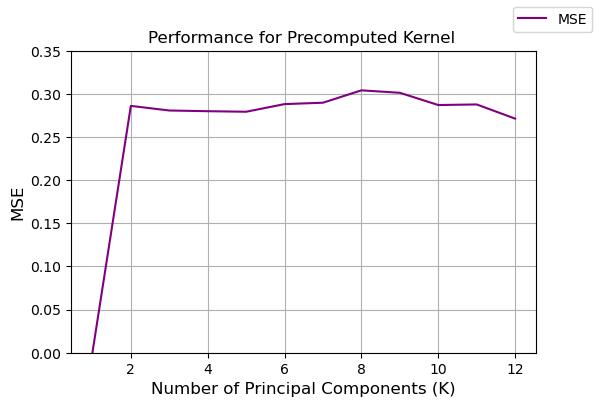

In [43]:
xaxis = range(1,13)
fig = plt.figure(dpi=100)
plt.ylim([0, 0.35])
plt.xlabel("Number of Principal Components (K)", fontsize = 12)
plt.title('Performance for Precomputed Kernel ')
plt.ylabel("MSE", fontsize = 12)
plt.plot(xaxis, MSE, label="MSE", color = 'purple') 
fig.legend(loc = "upper right")
plt.grid()